In [347]:
#load packages
import os
import ast
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [226]:
#loading train and test files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#check out the data
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
train.shape

(3000, 23)

In [8]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [13]:
#train data has 23 features, 5 numerical (revenue is the response variable) 18 catrgrical. 
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [15]:
#check out the missing values
#seems like belongs_to_collection and homepage have really large number of missing values (out of total 3000 observations)
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [10]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [18]:
test.shape

(4398, 22)

In [11]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [12]:
test.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
dtype: object

In [17]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [177]:
#EDA
type(train["belongs_to_collection"][0])

str

In [227]:
#notice the type of the "belongs_to_collection" is string, even though it looks like dictioary
#the features have the same problems are 'genres', 'production_companies','production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew'
#we need to put that into a proper format. from kernel https://www.kaggle.com/gravix/gradient-in-a-box
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

In [200]:
type(train['belongs_to_collection'][0][0])

dict

In [182]:
#belongs_to_collection
#I want to check if the movies in the same series are belong to the same collection
train[train['title'] == 'The Princess Diaries 2: Royal Engagement']['belongs_to_collection']

1    [{'name': 'The Princess Diaries Collection', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'id': 107674}]
Name: belongs_to_collection, dtype: object

In [183]:
train.loc[train['title'] == 'The Princess Diaries']['belongs_to_collection']

1377    [{'name': 'The Princess Diaries Collection', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'id': 107674}]
Name: belongs_to_collection, dtype: object

In [171]:
#Interesting find: although 'The Princess Diaries 2: Royal Engagement' is the sequel of 'The Princess Diaries',
#but they share the same collection name and the poster. By searching the poster_path, I found that the two movies
#were released as a collection https://www.themoviedb.org/collection/107674
#That's way there are so many missing values of "belongs_to_collection" attribute, it is simply becasue of not too many
#movies are in the series

In [228]:
#I suppose only the name of the collection matters in the analysis, so I will only keep the collection name as its own feature
#Also wheather a movie has a collection matters too
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 1 if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: 1 if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

In [229]:
train.dtypes

id                      int64  
budget                  int64  
genres                  object 
homepage                object 
imdb_id                 object 
original_language       object 
original_title          object 
overview                object 
popularity              float64
poster_path             object 
production_companies    object 
production_countries    object 
release_date            object 
runtime                 float64
spoken_languages        object 
status                  object 
tagline                 object 
title                   object 
Keywords                object 
cast                    object 
crew                    object 
revenue                 int64  
collection_name         object 
has_collection          int64  
dtype: object

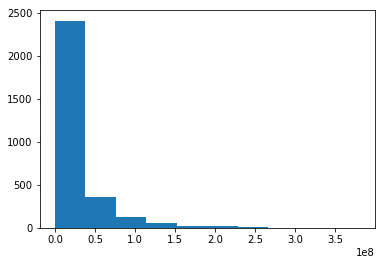

In [266]:
#budget
plt.subplot(1, 1, 1)
plt.hist(train['budget'])
plt.show()

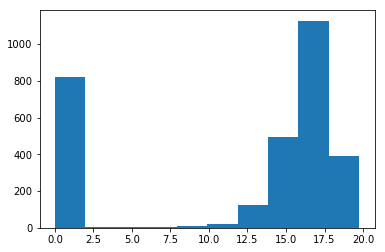

16.454567959008102

In [323]:
#the budget is highly skewed, let try to standardize it: (obs-mean)/variance
# std_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()
# stand_budget = std_scaler.fit_transform(train['budget'].values[:,np.newaxis])
# minmax_budget = minmax_scaler.fit_transform(train['budget'].values[:,np.newaxis])
plt.hist(np.log1p(train['budget']))
plt.show()
np.log1p(train['budget'])[0]

In [339]:
#0 budget sounds suspicious.
#what are the movies that have 0 budget? 
train[train['budget']==0][['original_title']]

,original_title
4,마린보이
7,Control Room
8,Muppet Treasure Island
11,Revenge of the Nerds II: Nerds in Paradise
17,The Invisible Woman
22,V/H/S
23,InSight
24,Black Sheep
25,Dr. Giggles
31,Caché


In [ ]:
#I have checked some of the movies on the list, apperately most of them actually have budget > 0 
#so I assume the 0 budget movie are missing values. 

In [324]:
#by using the log transformation on the budget, we can see that a lot of the movies have 0 budget (812)
#to transform back to the original value
np.expm1(np.log1p(train['budget'])[0])

14000000.00000001

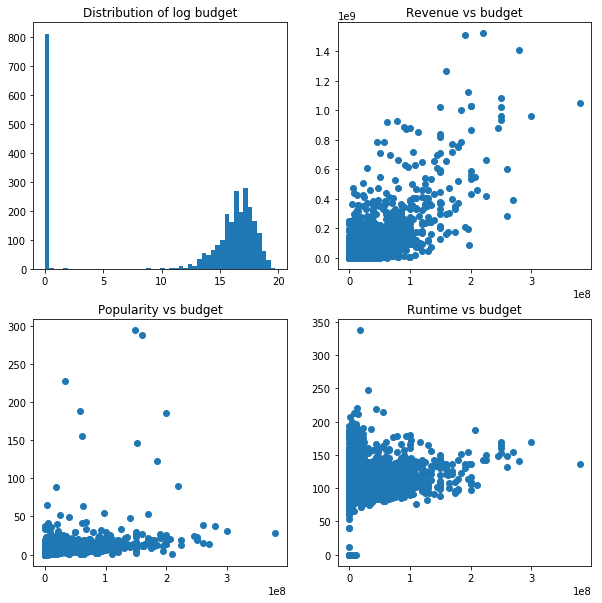

In [346]:
#budget
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.hist(np.log1p(train['budget']),bins=50)
plt.title('Distribution of log budget')
plt.subplot(2, 2, 2)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget')
plt.subplot(2, 2, 3)
plt.scatter(train['budget'], train['popularity'])
plt.title('Popularity vs budget')
plt.subplot(2, 2, 4)
plt.scatter(train['budget'], train['runtime'])
plt.title('Runtime vs budget')
plt.show()

In [359]:
#add log budget to features
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

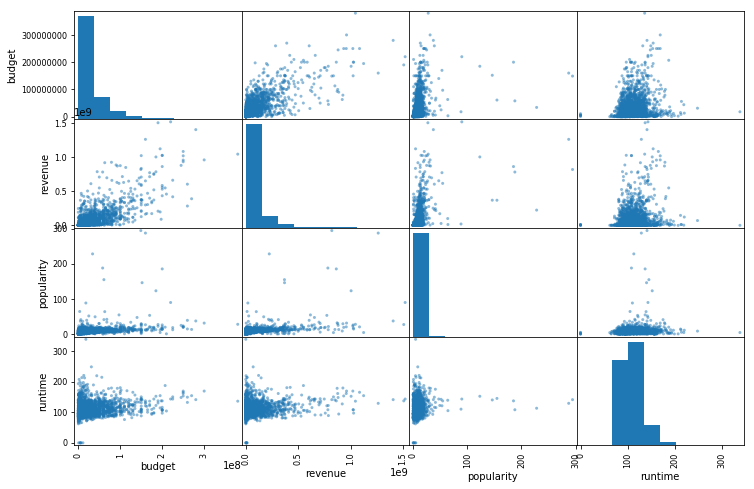

In [363]:
#popularity, runtime and revenue all seems to be correlated with budget
#let's check out relationship between then without all the 0 budget
train_budgetNotZero = train[train['budget'] != 0]
num_attributes = ['budget', 'revenue', 'popularity', 'runtime']
scatter_matrix(train_budgetNotZero[num_attributes], figsize=(12,8))
plt.show()

In [366]:
train_budgetNotZero['title'].shape

(2188,)

In [ ]:
#it seems like all numerical attributes have positive relationship with budget. 